In [2]:
df = pd.read_csv("play_tennis.csv")

In [3]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
df.drop(columns=["day"],inplace=True)

## <font color='red'>PROBLEM/QUERY:

### outlook=Sunny ,Temp=Hot ,Humididty=High ,Wind=Weak
### play or not??

## <font color='blue'>SOLUTION:

#### p(Yes | Suuny,Hot,High, Weak) = p(Sunny|Yes) * p(Hot|Yes) * p(High|Yes) * p(Weak|Yes) * p(Yes)

#### p(No | Suuny,Hot,High, Weak) = p(Sunny|No) * p(Hot|No) * p(High|No) * p(Weak|No) * p(No)

#### compare and decide using the maximum a posteriori rule above 

## 

### <font color='brown'>MANUAL PROCEDURE:
### Training

### lookup table to store all required probabilities.

### Testing

In [8]:
# P(Yes)
# p(No)
df['play'].value_counts()

Yes    9
No     5
Name: play, dtype: int64

In [9]:
py = 9/14
pn = 5/14
print(py)
print(pn)

0.6428571428571429
0.35714285714285715


In [10]:
# Outlook columns

pd.crosstab(df['outlook'],df['play'])

play,No,Yes
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [11]:
# No 
pon = 0
prn = 2/5
psn = 3/5

# Yes
poy = 4/9
pry = 3/9
psy= 2/9

In [12]:
pd.crosstab(df['temp'],df['play'])

play,No,Yes
temp,,
Cool,1,3
Hot,2,2
Mild,2,4


In [13]:
# No 
pcooln = 1/5
photn = 2/5
pmildn = 2/5

# Yes
pcooly = 3/9
photy = 2/9
pmildy= 4/9

In [14]:
pd.crosstab(df['humidity'],df['play'])

play,No,Yes
humidity,,
High,4,3
Normal,1,6


In [15]:
# No 
phighn = 4/5
pnormaln = 1/5

# Yes
phighy = 3/9
pnormaly = 6/9


In [16]:
pd.crosstab(df['wind'],df['play'])

play,No,Yes
wind,,
Strong,3,3
Weak,2,6


In [17]:
# No 
pstrongn = 3/5
pweakn = 2/5

# Yes
pstrongy = 3/9
pweaky = 6/9


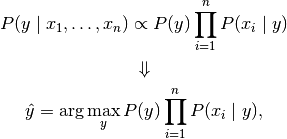

#### Now find the probability of yes by the formaula from above
### <font color='green'>outlook=Sunny ,Temp=Hot ,Humididty=High ,Wind=Weak


In [18]:
pyes = py * photy * phighy * pweaky 
pyes

0.031746031746031744

#### Now find the probability of yes by the formaula from above
### <font color='green'>outlook=Sunny ,Temp=Hot ,Humididty=High ,Wind=Weak

In [19]:
# No
pno = pn * photn * phighn * pweakn 
pno

0.04571428571428573

#### so we cosider the maximum probability which is no  as output.
#### This is how internally naive bayes classifier works.